In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [24]:
# load dataset and show the first five sample
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


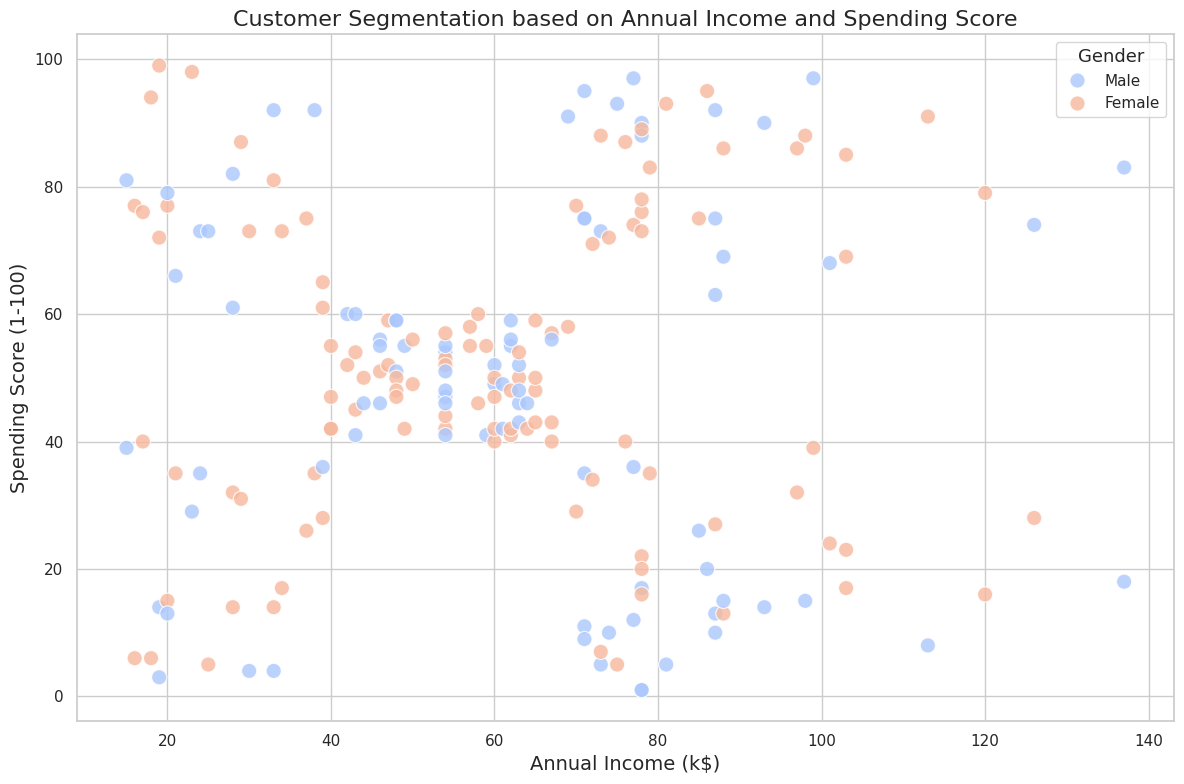

In [28]:
plt.figure(figsize=(12, 8))  # Slightly wider than square for a balanced view
sns.scatterplot(
    x='AnnualIncome',
    y='SpendingScore',
    data=df,
    hue='Gender',
    palette='coolwarm',  # More distinct color contrast
    s=120,               # Slightly larger marker size
    alpha=0.8            # Slightly more opaque for visibility
)
plt.title('Customer Segmentation based on Annual Income and Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Gender', title_fontsize='13', fontsize='11', loc='upper right')  # Placing legend in the top right
plt.grid(True)  # Adding grid lines for readability
plt.tight_layout()
plt.show()


## Data Preprocessing

For this case study, we only use income and spending score

In [29]:
# create new dataframe that consist only annual income and spending score
dff = df[['AnnualIncome', 'SpendingScore']]
dff.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [30]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=["AnnualIncome","SpendingScore"])
dff.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [31]:
# get stastical information on the new dataset
dff.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

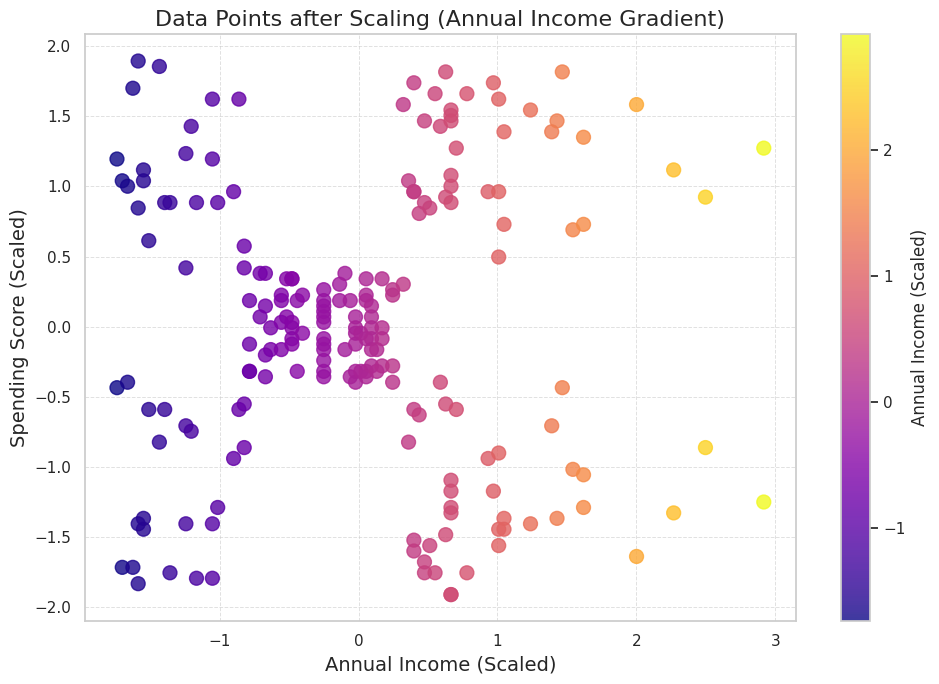

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 7))  # Slightly larger figure for better readability
scatter = plt.scatter(
    x=dff['AnnualIncome'],
    y=dff['SpendingScore'],
    s=100,                     # Larger marker size for visibility
    alpha=0.8,                 # Slightly less transparent
    c=dff['AnnualIncome'],     # Color-coded by Annual Income for gradient effect
    cmap='plasma'              # 'plasma' colormap for income gradient
)
plt.colorbar(scatter, label='Annual Income (Scaled)')  # Color bar for income levels
plt.title('Data Points after Scaling (Annual Income Gradient)', fontsize=16)
plt.xlabel('Annual Income (Scaled)', fontsize=14)
plt.ylabel('Spending Score (Scaled)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)  # Slightly more defined grid lines
plt.tight_layout()
plt.show()


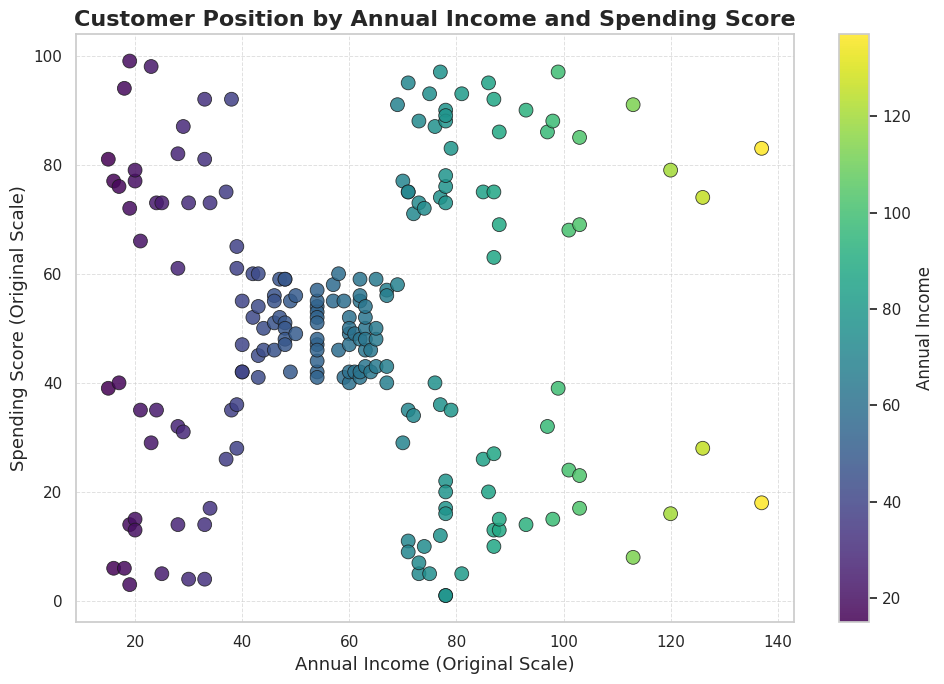

In [43]:
# Apply seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 7))  # Larger figure for better readability
scatter = plt.scatter(
    x=df['AnnualIncome'],
    y=df['SpendingScore'],
    s=100,                     # Larger marker size for better visibility
    alpha=0.85,                # Adjusted transparency for enhanced visibility
    c=df['AnnualIncome'],      # Color-coded by Annual Income
    cmap='viridis',            # 'viridis' colormap for a modern look
    edgecolor='k',             # Black edge for markers to make them stand out
    linewidth=0.6              # Thin edge for subtle emphasis
)
plt.colorbar(scatter, label='Annual Income')  # Color bar for annual income levels
plt.title('Customer Position by Annual Income and Spending Score', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (Original Scale)', fontsize=13)
plt.ylabel('Spending Score (Original Scale)', fontsize=13)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)  # Enhanced grid style
plt.tight_layout()
plt.show()


## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [52]:
# set the parameter for evaluating K
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(dff)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

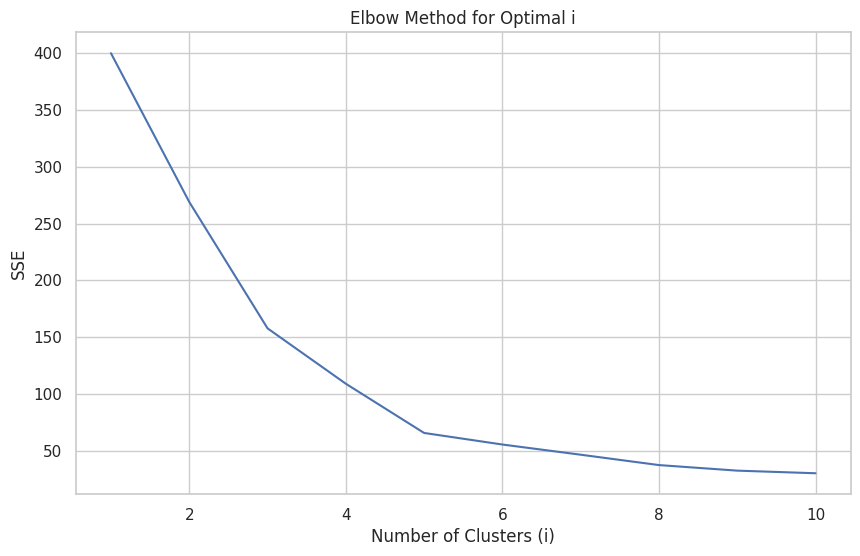

In [54]:
# manually visualize the elbow method using plotlib
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.title('Elbow Method for Optimal i')
plt.xlabel('Number of Clusters (i)')
plt.ylabel('SSE')

In [56]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best i for your model is:", kneedle.elbow)

The best i for your model is: 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [57]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(dff)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

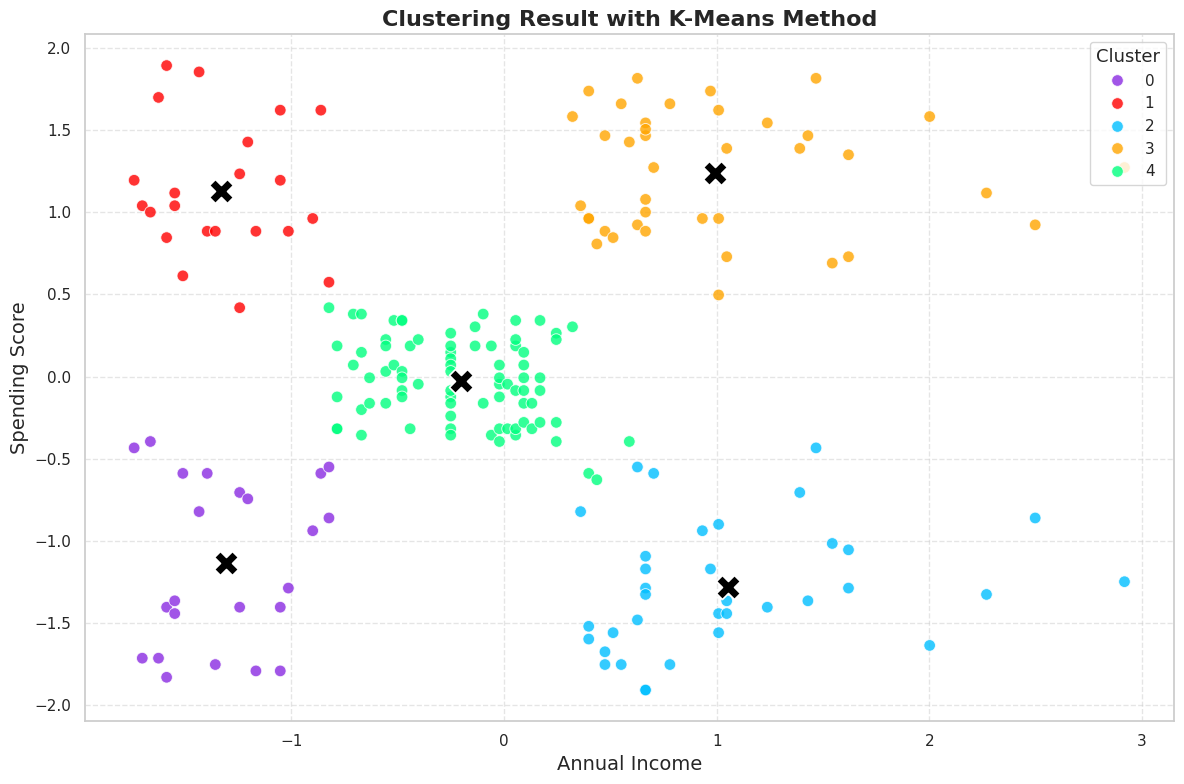

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))  # Slightly larger for better visualization

# Scatter plot for clustering results
sns.scatterplot(
    x="AnnualIncome",
    y="SpendingScore",
    hue=y_pred,
    palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"],
    data=new_df,
    s=70,                   # Increased marker size for data points
    alpha=0.8               # Slightly transparent for clarity
)

# Plot the cluster centers with larger black markers
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,                  # Larger size for cluster centers
    c="black",
    marker="X",             # Use 'X' marker for distinct look
    edgecolor="white",      # White edge for visibility
    linewidth=1.2           # Edge thickness
)

plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Spending Score", fontsize=14)
plt.title("Clustering Result with K-Means Method", fontsize=16, fontweight='bold')
plt.legend(title="Cluster", title_fontsize="13", fontsize="11", loc="upper right")  # Added legend for clusters
plt.grid(True, linestyle="--", alpha=0.5)  # Slightly transparent grid for readability
plt.tight_layout()
plt.show()


In [59]:
# Inverse transform the scaled data to get the original values
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=["AnnualIncome","SpendingScore"])
dff.head()

,AnnualIncome,SpendingScore
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0


In [61]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'SpendingScore': ['mean', 'std', 'min', 'max'],
                                          'AnnualIncome': ['mean', 'std', 'min', 'max']})
cluster_summary = cluster_summary.rename_axis('cluster')
cluster_summary

SpendingScore                    AnnualIncome                    
                 mean        std min max         mean        std min  max
cluster                                                                  
0           20.913043  13.017167   3  40    26.304348   7.893811  15   39
1           79.363636  10.504174  61  99    25.727273   7.566731  15   39
2           17.114286   9.952154   1  39    88.200000  16.399067  70  137
3           82.128205   9.364489  63  97    86.538462  16.312485  69  137
4           49.518519   6.530909  34  61    55.296296   8.988109  39   76

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

Cluster 0: Low Income, Low Spending Score

Characteristics:
Customers in this cluster have a low average annual income (mean: 26.3) and low spending scores (mean: 20.9).
Income and spending score both show lower variability, indicating a consistent segment with limited spending power.
Suggestion:
Consider targeting these customers with affordable, entry-level products or services.
Offering discounts, loyalty rewards, or incentives could encourage increased spending.
Cluster 1: Low Income, High Spending Score

Characteristics:
This group has a low average income (mean: 25.7) but a high spending score (mean: 79.4).
These customers are likely motivated to spend despite limited financial means.
Suggestion:
This segment could be targeted with aspirational or mid-tier products.
Offer flexible payment plans or installment options to make products more accessible.
Cluster 2: High Income, Low Spending Score

Characteristics:
Customers here have high average incomes (mean: 88.2) but low spending scores (mean: 17.1).
They may be more selective or value-conscious, despite having significant purchasing power.
Suggestion:
Implement personalized marketing strategies or premium loyalty programs to encourage engagement.
Offer exclusive deals or limited-time offers that might appeal to their higher income levels and drive spending.
Cluster 3: High Income, High Spending Score

Characteristics:
This is the most lucrative group, with high average income (mean: 86.5) and high spending scores (mean: 82.1).
These customers are both willing and able to spend, likely representing the company’s most valuable customers.
Suggestion:
Focus on providing premium products or exclusive experiences.
Consider offering VIP memberships, priority services, and high-value rewards programs to retain their loyalty.
Cluster 4: Moderate Income, Moderate Spending Score

Characteristics:
This segment has moderate income (mean: 55.3) and a balanced spending score (mean: 49.5).
Customers in this group could be middle-income consumers who spend moderately.
Suggestion:
Develop a range of products that cater to this middle-income group, balancing quality with affordability.
Run seasonal promotions to encourage increased spending from this stable, potentially loyal customer base.

<write here>